# SARIMAX
https://towardsdatascience.com/time-series-forecasting-a-getting-started-guide-c435f9fa2216

## 1 - Data Prep

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
import statsmodels.api as sm

In [12]:
root = "../"
path = root + 'CSV/TabNet/Internacoes/'
municipio = "330455 Rio de Janeiro"#"292740 Salvador"#"270860 São Miguel dos Campos"#"355030 São Paulo"
all_files = glob.glob(path + "*.csv")
df_diseases = pd.DataFrame()
list_of_diseases = []
for file in all_files:
    file_name = file.split("\\")[1]
    disease = file_name.split(".")[0]
    list_of_diseases.append(disease)
    df_disease = pd.read_csv(path + file_name, sep=";")
    df_disease = df_disease[df_disease["Município"] == municipio]#"330455 Rio de Janeiro"]#"292740 Salvador"]#"355030 São Paulo"]
    if not df_disease.empty:
        df_disease= df_disease.filter(regex='2008|2009|2010|2011|2012|2013|2014|2015|2016|2017|2018', axis=1)
        df_disease = df_disease.transpose()
        df_disease.columns = [disease]
        df_disease = df_disease.replace("-",0)
        df_disease = df_disease.astype(int)
        df_diseases[disease] = df_disease[disease]
df_diseases = df_diseases.fillna(0)

In [13]:
from datetime import datetime
month_dic = {
    "Jan": "January",
    "Fev": "February",
    "Mar": "March",
    "Abr": "April",
    "Mai": "May",
    "Jun": "June",
    "Jul": "July",
    "Ago": "August",
    "Set": "September",
    "Out": "October",
    "Nov": "November",
    "Dez": "December"
}
indexes = []
for i,e in enumerate(df_diseases.index): 
    ano = e.split("/")[0]
    mes = e.split("/")[1]
    month = month_dic[mes]
    datetime_object = datetime.strptime(month, "%B")
    indexes.append(str(datetime_object.month) + "/" + str(ano))
df_diseases.index = indexes
df_diseases.head()

,ABORTO_ESPONTÂNEO,ABORTO_POR_RAZÕES_MÉDICAS,ACIDENTES_DE_TRANSPORTE,ACID_VASCULAR_CEREBR_ISQUÊM_TRANSIT_E_SÍNDR_CORREL,ACID_VASCULAR_CEREBR_NÃO_ESPEC_HEMORRÁG_OU_ISQUÊM,AFECÇ_HEMORRÁG_E_OUTR_DOENÇ_SANG_E_ÓRG_HEMATOPOÉT,AGRESSÕES,ALGUNS_TRANSTORNOS_ENVOLVENDO_MECANISMO_IMUNITÁRIO,AMEBÍASE,ANCILOSTOMÍASE,...,TUBERCULOSE_DO_SISTEMA_NERVOSO,TUBERCULOSE_MILIAR,TUBERCULOSE_PULMONAR,TUBERCULOSE_ÓSSEA_E_DAS_ARTICULAÇÕES,TUBERC_INTEST_PERITÔNIO_GLÂNGL_MESENTÉRICOS,TÉTANO_NEONATAL,UROLITÍASE,VARICELA_E_HERPES_ZOSTER,VEIAS_VARICOSAS_DAS_EXTREMIDADES_INFERIORES,ÚLCERA_GÁSTRICA_E_DUODENAL
1/2008,192,1,0.0,26,106,29,0.0,0,0,0.0,...,0,1,84,0,0.0,0.0,53,2,37,12
2/2008,198,1,0.0,47,117,28,0.0,1,0,0.0,...,0,0,110,0,0.0,0.0,39,3,29,20
3/2008,210,1,0.0,36,124,37,0.0,1,1,0.0,...,0,2,127,0,0.0,0.0,66,6,35,5
4/2008,230,3,0.0,51,135,32,0.0,0,0,0.0,...,0,2,113,0,2.0,0.0,68,4,51,16
5/2008,258,9,0.0,59,154,33,1.0,1,0,0.0,...,1,3,161,0,0.0,0.0,53,4,34,19


In [14]:
path = root + 'CSV/TabNet/Suicides/'
all_files = glob.glob(path + "*.csv")
df_suicides = pd.DataFrame()
list_of_years = []
for file in all_files:
    file_name = file.split("\\")[1]
    year = file_name.split("_")[1].split(".")[0]
    list_of_years.append(year)
    df_year = pd.read_csv(path + file_name, sep=";")
    df_year = df_year.replace("-",0)
    df_year = df_year[df_year["Município"] == municipio]
    df_year = df_year.drop(columns=["Município", "Total"])
    if not df_year.empty:
        df_year = df_year.transpose()
        df_year.columns = ["SUICIDE"]
        df_year = df_year.astype(int)
        df_year.index = df_year.index + "/" + year
        df_suicides = pd.concat([df_suicides, df_year])

In [15]:
from datetime import datetime
month_dic = {
    "Janeiro": "January",
    "Fevereiro": "February",
    "Março": "March",
    "Abril": "April",
    "Maio": "May",
    "Junho": "June",
    "Julho": "July",
    "Agosto": "August",
    "Setembro": "September",
    "Outubro": "October",
    "Novembro": "November",
    "Dezembro": "December"
}
indexes = []
for i,e in enumerate(df_suicides.index): 
    mes = e.split("/")[0]
    ano = e.split("/")[1]
    month = month_dic[mes]
    datetime_object = datetime.strptime(month, "%B")
    indexes.append(str(datetime_object.month) + "/" + str(ano))
df_suicides.index = indexes
df_suicides.head()

,SUICIDE
1/2008,8
2/2008,6
3/2008,15
4/2008,13
5/2008,12


For now we will only use some of the diseases' data

In [16]:
df = df_diseases.copy()
df["SUICIDE"] = df_suicides["SUICIDE"]
#chosen = ["TRANSTORNOS_DE_HUMOR_[AFETIVOS]", "TRANST_MENTAIS_E_COMPORTAMENTAIS_DEV_USO_DE_ÁLCOOL", "NEOPLASIA_MALIGNA_DO_CÓLON", "NEOPL_MALIG_JUNÇÃO_RETOSSIGM_RETO_ÂNUS_CANAL_ANAL", "BRONQUITE_ENFISEMA_E_OUTR_DOENÇ_PULM_OBSTR_CRÔNIC", "SUICIDE"]
chosen = ['TRANSTORNOS_DE_HUMOR_[AFETIVOS]',
 'TRANST_MENTAIS_E_COMPORTAMENTAIS_DEV_USO_DE_ÁLCOOL',
 'NEOPLASIA_MALIGNA_DO_CÓLON',
 'NEOPLASIA_MALIGNA_DE_TRAQUÉIA_BRÔNQUIOS_E_PULMÕES',
 'TRANST_MENTAIS_COMPORT_DEV_USO_OUTR_SUBST_PSICOAT',
 'BRONQUITE_ENFISEMA_E_OUTR_DOENÇ_PULM_OBSTR_CRÔNIC',
#  'NEOPL_MALIG_JUNÇÃO_RETOSSIGM_RETO_ÂNUS_CANAL_ANAL',
#  'OUTRAS_NEOPLASIAS_MALIGNAS_DA_PELE',
#  'TRANSTORNOS_DE_CONDUÇÃO_E_ARRITMIAS_CARDÍACAS',
#  'FLEBITE_TROMBOFLEBITE_EMBOLIA_E_TROMBOSE_VENOSA',
#  'OUTRAS_DOENÇAS_ISQUÊMICAS_DO_CORAÇÃO',
#  'TRANSTORNOS_DOS_NERVOS_RAÍZES_E_PLEXOS_NERVOSOS',
#  'NEOPL_MALIG_OUTR_LOCALIZ_MAL_DEF_SECUN_E_NÃO_ESPEC',
#  'DOENÇAS_DO_APÊNDICE',
#  'COLELITÍASE_E_COLECISTITE',
#  'NEOPLASIA_MALIGNA_DO_ESÔFAGO',
#  'OUTROS_TRANSTRONOS_ARTICULARES',
#  'UROLITÍASE',
#  'PANCREATITE_AGUDA_E_OUTRAS_DOENÇAS_DO_PÂNCREAS',
#  'TRANSTORNOS_DA_DENSIDADE_E_DA_ESTRUTURA_ÓSSEAS', 
          'SUICIDE']
df = df[chosen]
df.head()

,TRANSTORNOS_DE_HUMOR_[AFETIVOS],TRANST_MENTAIS_E_COMPORTAMENTAIS_DEV_USO_DE_ÁLCOOL,NEOPLASIA_MALIGNA_DO_CÓLON,NEOPLASIA_MALIGNA_DE_TRAQUÉIA_BRÔNQUIOS_E_PULMÕES,TRANST_MENTAIS_COMPORT_DEV_USO_OUTR_SUBST_PSICOAT,BRONQUITE_ENFISEMA_E_OUTR_DOENÇ_PULM_OBSTR_CRÔNIC,SUICIDE
1/2008,171,152,50,47,141,49,8
2/2008,104,57,46,51,60,50,6
3/2008,110,70,43,68,61,48,15
4/2008,133,67,50,49,85,69,13
5/2008,125,62,55,60,89,66,12


In [17]:
df.index = pd.to_datetime(df.index)
index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='MS')
df = df.reindex(index)

In [28]:
nobs = 8
df_train, df_test = df["SUICIDE"][0:-nobs], df["SUICIDE"][-nobs:]

In [ ]:
#we use tra.diff()(differenced data), because this time series is unit root process.
fig,ax = plt.subplots(2,1,figsize=(20,10))
fig = sm.graphics.tsa.plot_acf(df_train.diff().dropna(), lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(df_train.diff().dropna(), lags=50, ax=ax[1])
plt.show()

In [29]:
resDiff = sm.tsa.arma_order_select_ic(df_train, max_ar=5, max_ma=5, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

C:\Users\pypas\anaconda3\envs\ML\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\pypas\anaconda3\envs\ML\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\pypas\anaconda3\envs\ML\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\pypas\anaconda3\envs\ML\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\pypas\anaconda3\envs\ML\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'availa

ARMA(p,q) = (3, 2) is the best.


In [30]:
ar = resDiff['aic_min_order'][0]
ma = resDiff['aic_min_order'][1]

In [21]:
res = sm.tsa.adfuller(df['SUICIDE'].dropna(),regression='ct')
print('p-value:{}'.format(res[1]))

p-value:4.703838606958051e-14


# Arima

In [31]:
arima = sm.tsa.statespace.SARIMAX(df_train,order=(ar,1,ma),freq="MS",seasonal_order=(0,0,0,0),
                                 enforce_stationarity=False, enforce_invertibility=False,).fit()
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                SUICIDE   No. Observations:                  124
Model:               SARIMAX(3, 1, 2)   Log Likelihood                -345.001
Date:                Wed, 09 Sep 2020   AIC                            702.001
Time:                        18:27:21   BIC                            718.726
Sample:                    01-01-2008   HQIC                           708.793
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9671      0.099      9.813      0.000       0.774       1.160
ar.L2         -0.3164      0.096     -3.305      0.001      -0.504      -0.129
ar.L3         -0.0107      0.028     -0.386      0.699      -0.065       0.043
ma.L1         -1.8304      0.046    -39.378      0.000      -1.922      -1.739
ma.L2          0.9342      0.043     21.507      0.000       0.849       1.019
sigma2        17.5714      2.347      7.487      0.000      12.972      22.171
===================================================================================
Ljung-Box (Q):                       34.38   Jarque-Bera (JB):                 1.60
Prob(Q):                              0.72   Prob(JB):                         0.45
Heteroskedasticity (H):               1.78   Skew:                             0.27
Prob(H) (two-sided):                  0.07   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
res = arima.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()

ARIMA model MSE:20.209086781101266


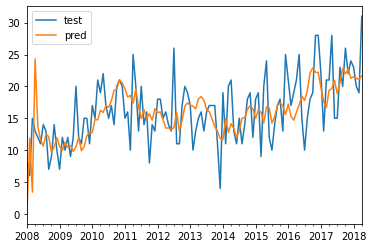

In [32]:
from sklearn.metrics import mean_squared_error
pred = arima.predict(df_train.index[0],df_train.index[-1])
print('ARIMA model MSE:{}'.format(mean_squared_error(df_train,pred)))
pd.DataFrame({'test':df_train,'pred':pred}).plot();plt.show()

ARIMA model MSE:15.388362564573669


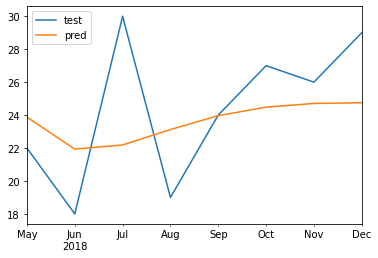

In [33]:
pred = arima.predict(df_test.index[0],df_test.index[-1])
print('ARIMA model MSE:{}'.format(mean_squared_error(df_test,pred)))
pd.DataFrame({'test':df_test,'pred':pred}).plot();plt.show()

# Arimax

In [34]:
exog_train, exog_test = df.drop(columns="SUICIDE")[0:-nobs], df.drop(columns="SUICIDE")[-nobs:]
arimax = sm.tsa.statespace.SARIMAX(df_train,order=(ar,1,ma),seasonal_order=(0,0,0,0),exog = exog_train,freq='MS',
                                  enforce_stationarity=False, enforce_invertibility=False,).fit()
arimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                SUICIDE   No. Observations:                  124
Model:               SARIMAX(3, 1, 2)   Log Likelihood                -345.150
Date:                Wed, 09 Sep 2020   AIC                            714.301
Time:                        18:27:30   BIC                            747.751
Sample:                    01-01-2008   HQIC                           727.885
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
TRANSTORNOS_DE_HUMOR_[AFETIVOS]                        0.0097      0.033      0.295      0.768      -0.055       0.075
TRANST_MENTAIS_E_COMPORTAMENTAIS_DEV_USO_DE_ÁLCOOL    -0.1503      0.063     -2.392      0.017      -0.273      -0.027
NEOPLASIA_MALIGNA_DO_CÓLON                            -0.0153      0.044     -0.344      0.731      -0.102       0.072
NEOPLASIA_MALIGNA_DE_TRAQUÉIA_BRÔNQUIOS_E_PULMÕES      0.0152      0.047      0.322      0.748      -0.077       0.108
TRANST_MENTAIS_COMPORT_DEV_USO_OUTR_SUBST_PSICOAT      0.0563      0.043      1.299      0.194      -0.029       0.141
BRONQUITE_ENFISEMA_E_OUTR_DOENÇ_PULM_OBSTR_CRÔNIC      0.0067      0.044      0.153      0.879      -0.080       0.093
ar.L1                                                 -0.9318      0.145     -6.420      0.000      -1.216      -0.647
ar.L2                                                 -0.1734      0.208     -0.834      0.405      -0.581       0.234
ar.L3                                                 -0.2211      0.126     -1.760      0.078      -0.467       0.025
ma.L1                                                  0.1688    214.758      0.001      0.999    -420.750     421.087
ma.L2                                                 -0.8312    178.516     -0.005      0.996    -350.715     349.053
sigma2                                                17.7218   3806.589      0.005      0.996   -7443.056    7478.499
===================================================================================
Ljung-Box (Q):                       32.73   Jarque-Bera (JB):                 1.20
Prob(Q):                              0.79   Prob(JB):                         0.55
Heteroskedasticity (H):               2.02   Skew:                             0.24
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

ARIMAX model MSE:21.573648935800144


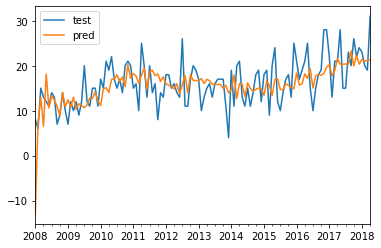

In [35]:
from sklearn.metrics import mean_squared_error
pred = arimax.predict(df_train.index[0],df_train.index[-1],exog = exog_train)
print('ARIMAX model MSE:{}'.format(mean_squared_error(df_train,pred)))
pd.DataFrame({'test':df_train,'pred':pred}).plot();plt.show()

ARIMAX model MSE:21.64220412215679


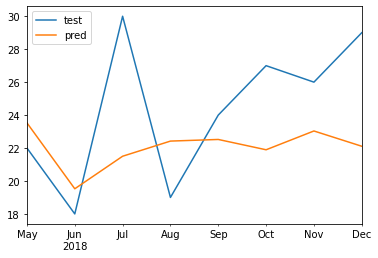

In [36]:
pred = arimax.predict(df_test.index[0],df_test.index[-1],exog = exog_test)
print('ARIMAX model MSE:{}'.format(mean_squared_error(df_test,pred)))
pd.DataFrame({'test':df_test,'pred':pred}).plot();plt.show()

# Sarimax

In [37]:
sarimax = sm.tsa.statespace.SARIMAX(df_train,order=(ar,1,ma),seasonal_order=(ar,1,ma,12),exog = exog_train,
                                enforce_stationarity=False, enforce_invertibility=False,freq='MS').fit()
sarimax.summary()

C:\Users\pypas\anaconda3\envs\ML\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            SUICIDE   No. Observations:                  124
Model:             SARIMAX(3, 1, 2)x(3, 1, 2, 12)   Log Likelihood                -208.407
Date:                            Wed, 09 Sep 2020   AIC                            450.813
Time:                                    18:27:53   BIC                            489.516
Sample:                                01-01-2008   HQIC                           466.221
                                     - 04-01-2018                                         
Covariance Type:                              opg                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
TRANSTORNOS_DE_HUMOR_[AFETIVOS]                        0.0771      0.048      1.590      0.112      -0.018       0.172
TRANST_MENTAIS_E_COMPORTAMENTAIS_DEV_USO_DE_ÁLCOOL    -0.0095      0.118     -0.080      0.936      -0.241       0.222
NEOPLASIA_MALIGNA_DO_CÓLON                            -0.0658      0.054     -1.220      0.223      -0.172       0.040
NEOPLASIA_MALIGNA_DE_TRAQUÉIA_BRÔNQUIOS_E_PULMÕES      0.0448      0.067      0.667      0.505      -0.087       0.176
TRANST_MENTAIS_COMPORT_DEV_USO_OUTR_SUBST_PSICOAT      0.0659      0.078      0.846      0.398      -0.087       0.219
BRONQUITE_ENFISEMA_E_OUTR_DOENÇ_PULM_OBSTR_CRÔNIC     -0.0126      0.064     -0.195      0.845      -0.139       0.114
ar.L1                                                 -0.7072      0.750     -0.943      0.346      -2.177       0.763
ar.L2                                                 -0.1944      0.408     -0.476      0.634      -0.995       0.606
ar.L3                                                  0.0943      0.304      0.311      0.756      -0.501       0.690
ma.L1                                                 -0.3554      0.717     -0.495      0.620      -1.762       1.051
ma.L2                                                 -0.4448      0.558     -0.797      0.425      -1.539       0.649
ar.S.L12                                              -1.0913      0.184     -5.938      0.000      -1.452      -0.731
ar.S.L24                                              -0.5707      0.203     -2.810      0.005      -0.969      -0.173
ar.S.L36                                              -0.2904      0.117     -2.481      0.013      -0.520      -0.061
ma.S.L12                                               0.6370      0.273      2.333      0.020       0.102       1.172
ma.S.L24                                               0.0332      0.214      0.155      0.877      -0.387       0.453
sigma2                                                17.8169      3.695      4.822      0.000      10.575      25.059
===================================================================================
Ljung-Box (Q):                       23.21   Jarque-Bera (JB):                 1.85
Prob(Q):                              0.98   Prob(JB):                         0.40
Heteroskedasticity (H):               0.64   Skew:                             0.26
Prob(H) (two-sided):                  0.28   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

SARIMAX model MSE:21.7242819593739


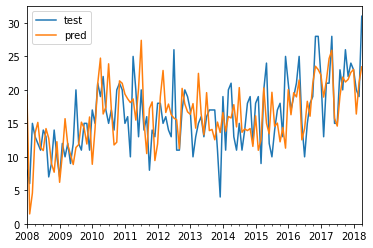

In [38]:
from sklearn.metrics import mean_squared_error
pred = sarimax.predict(df_train.index[0],df_train.index[-1],exog = exog_train)
print('SARIMAX model MSE:{}'.format(mean_squared_error(df_train,pred)))
pd.DataFrame({'test':df_train,'pred':pred}).plot();plt.show()

SARIMAX model MSE:27.18128466636085


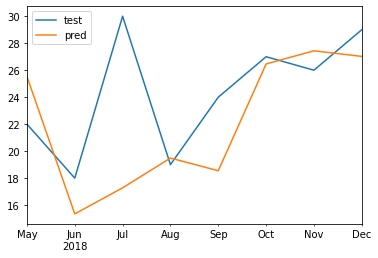

In [39]:
pred = sarimax.predict(df_test.index[0],df_test.index[-1],exog = exog_test)
print('SARIMAX model MSE:{}'.format(mean_squared_error(df_test,pred)))
pd.DataFrame({'test':df_test,'pred':pred}).plot();plt.show()